In [24]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.svm import SVC

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
!pip install git+https://github.com/jfilter/split-folders.git

  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-3uwg00o6
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-3uwg00o6
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for split-folders: filename=split_folders-0.5.1-py3-none-any.whl size=8394 sha256=2d15c7bc3c3708b724f72859a2e5843d0244500db8422cc8e91ab0183c5b88b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-65qy59p_/wheels/0c/da/06/fcebe493adfe604ee9a1d4511e3932a6e63a044edb7a10dec8
Successfully built split-folders


In [8]:
import splitfolders

input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

output_folder='/kaggle/working/Splitted'

train_ratio=0.8
validation_ratio=0.1
test_ratio=0.1
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

Copying files: 6400 files [00:13, 489.16 files/s] 


In [9]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical',
)


Found 5119 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [10]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [11]:
train_generator


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


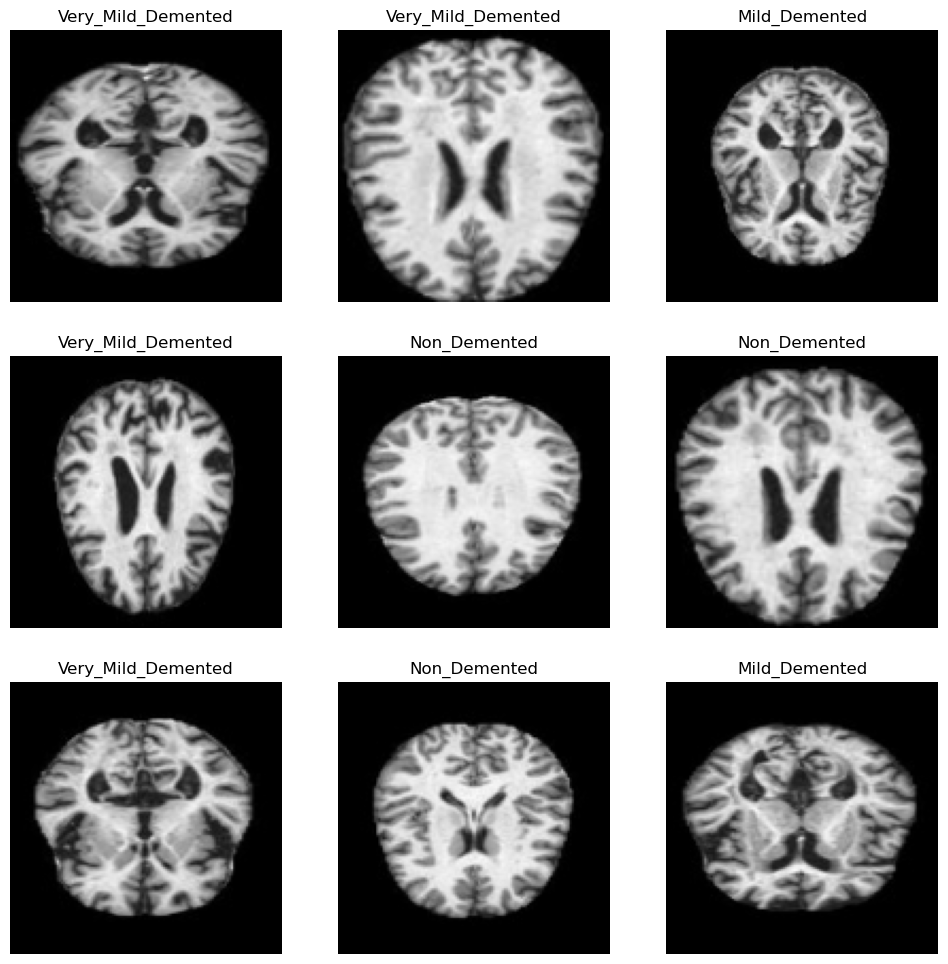

In [12]:
plt.figure(figsize=(12,12))

for images,labels in train_generator:
#     print(images)
#     print(len(labels))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

In [13]:
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    return data_augmentation/''

In [14]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

TypeError: unsupported operand type(s) for /: 'Sequential' and 'str'

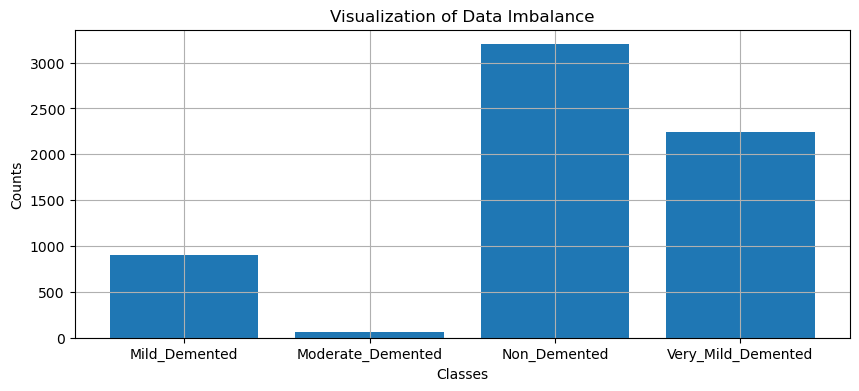

In [16]:
input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
plt.bar(class_count.keys(),class_count.values())

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

In [17]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


In [18]:
input_shape = (128,128, 3)

#Create an instance of the VGG19 model
vgg19 = VGG19(include_top=False, input_shape=input_shape,
                   weights='imagenet')

train_features = vgg19.predict(train_generator, steps=len(train_generator), verbose=1)
val_features=vgg19.predict(validation_generator,len(validation_generator),verbose=1)
test_features = vgg19.predict(test_generator, steps=len(test_generator), verbose=1)

11/11 [==============================] - 1s 68ms/step


In [19]:
train_labels=train_generator.classes
val_labels=validation_generator.classes
test_label=test_generator.classes

In [20]:
trainval_features = np.concatenate((train_features, val_features))
trainval_labels = np.concatenate((train_labels, val_labels))

In [23]:
trainval_features.shape

(6400, 4, 4, 512)

In [25]:
X_train_2d = trainval_features.reshape(trainval_features.shape[0], -1)

In [26]:
X_test_2d = test_features.reshape(test_features.shape[0], -1)

In [27]:
X_train_2d.shape

(6400, 8192)

In [ ]:
train_labels

In [29]:
indices = np.random.permutation(6400)

# Shuffle X_train and X_labels using the same indices
shuffled_X_train = X_train_2d[indices]
shuffled_X_labels = trainval_labels[indices]

In [30]:
import xgboost as xgb


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01]
}

# Perform grid search cross-validation
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(shuffled_X_train, shuffled_X_labels)

In [80]:
# Get the best parameters and best score found during grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [81]:
print(best_params)
print(best_score)

{'C': 0.1, 'kernel': 'rbf'}
0.500097751710655


In [82]:
#Creatig new XGB Model with best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(shuffled_X_train, shuffled_X_labels)

SVC(C=0.1)

In [83]:
best_svm.score(X_test_2d,test_label)

0.4984423676012461

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


# Make predictions on the test data
y_pred = best_xgb.predict(X_test_2d)

# Compute the confusion matrix
cm = confusion_matrix(test_label, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
